As a warm up, we will use simple linear model 



In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lin_model
from pandas import get_dummies

In [3]:


INPUT_SIGNAL_TYPES = [
    "body_acc_x_","body_acc_y_","body_acc_z_","body_gyro_x_","body_gyro_y_",
    "body_gyro_z_","total_acc_x_","total_acc_y_","total_acc_z_"
]

X_train_path = "C:/Human_Activity_Recognition/dataset/train/X_train.txt"
X_test_path = "C:/Human_Activity_Recognition/dataset/test/X_test.txt"

y_train_path = "C:/Human_Activity_Recognition/dataset/train/y_train.txt"
y_test_path = "C:/Human_Activity_Recognition/dataset/test/y_test.txt"

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()

    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1


def load_X(X_signals_paths):
    X_signals = []
    #for signal_type_path in X_signals_paths:
    signal_type_path = X_signals_paths
    file = open(signal_type_path, 'r')
    for line in file:
        line = line.strip()
        line = line.replace('  ', ' ')
        X_signals.append(line.split(' '))
    file.close()
    return np.array(X_signals)

X_train = load_X(X_train_path)
X_test = load_X(X_test_path)

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

X_train = np.array(X_train).astype(np.float32)
X_test  = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

y_train = pd.get_dummies(y_train.flatten())
y_test = pd.get_dummies(y_test.flatten())
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7352, 561) (2947, 561) (7352, 6) (2947, 6)


In [4]:
y_train_pd = pd.DataFrame(y_train)
y_train_pd.describe()
y_train_noonehot = load_y(y_train_path)
y_test_noonehot = load_y(y_test_path)

relatively balanced labels

An intuitive LR model with very good result, it was really suprised me.

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(penalty='l2', tol=0.0001, C=1.0,fit_intercept=True,max_iter=5000)
lr_model.fit(X_train,y_train_noonehot)
y_pred = lr_model.predict(X_test)
accuracy_score(y_pred,y_test_noonehot)

C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9619952494061758

In [8]:

from sklearn.model_selection import GridSearchCV
parameters  = [{'penalty': ['l1'], 'C': [0.001,0.01,0.1,1,10,100 ]}, {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1, 10, 100]}]
lr_model_cv = LogisticRegression()
clf = GridSearchCV(lr_model_cv, parameters,cv=5)
clf.fit(X_train, y_train_noonehot)


C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
print(clf.best_params_ )

{'C': 1, 'penalty': 'l1'}


In [12]:
parameters = { 'C':[1,2,3]}
lr_model_cv1 = LogisticRegression(penalty = '11')
parameters1 = {'C':[1,2,3,4,5]}
clf = GridSearchCV(lr_model, parameters1,cv=5)
clf.fit(X_train, y_train_noonehot)

C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [13]:
print(clf.best_params_ )

{'C': 5}


In [28]:
lr_best = LogisticRegression(penalty = 'l1',C=5)
lr_best.fit(X_train,y_train_noonehot)
y_pred = lr_best.predict(X_test)
y_trainpred = lr_best.predict(X_train)

print("Test Accuracy:{}".format(accuracy_score(y_pred,y_test_noonehot)))

C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy:0.9653885307091958


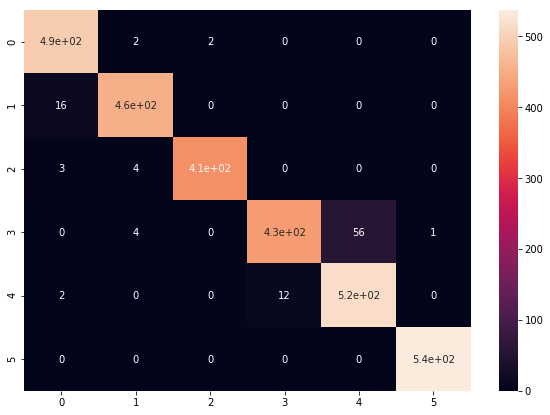

In [29]:
plt.figure(figsize=(10, 7))
confusion = confusion_matrix(y_test_noonehot,y_pred)
sns.heatmap(confusion, annot=True)
plt.show()

We can achieve 96.5% accuracy with Logistic Regression. And there is a little problem to predict 3 vs 4,which is 

0 WALKING
1 WALKING_UPSTAIRS
2 WALKING_DOWNSTAIRS
3 SITTING
4 STANDING
5 LAYING

Let's try neural network without activation function(also can be as a linear model)

The loss function we choose is the softmax function. The sigmoid function is used for the two-class logistic regression/classifiction, whereas the softmax function is used for the multiclass logistic regression/classification. Thus, we think the softmax function would be a better fit for our problems, since we have six different activities labels.

Loss at step 0: 14.700800
Training accuracy: 5.3%
Test accuracy: 6.5%
------------------------------------------------------------
Loss at step 2000: 1.002916
Training accuracy: 68.8%
Test accuracy: 67.3%
------------------------------------------------------------
Loss at step 4000: 0.656559
Training accuracy: 77.4%
Test accuracy: 75.3%
------------------------------------------------------------
Loss at step 6000: 0.509918
Training accuracy: 81.7%
Test accuracy: 79.4%
------------------------------------------------------------
Loss at step 8000: 0.424104
Training accuracy: 84.3%
Test accuracy: 82.7%
------------------------------------------------------------
Loss at step 10000: 0.365668
Training accuracy: 86.2%
Test accuracy: 84.6%
------------------------------------------------------------
Loss at step 12000: 0.322605
Training accuracy: 87.7%
Test accuracy: 85.8%
------------------------------------------------------------
Loss at step 14000: 0.289374
Training accuracy: 89.0%
Tes

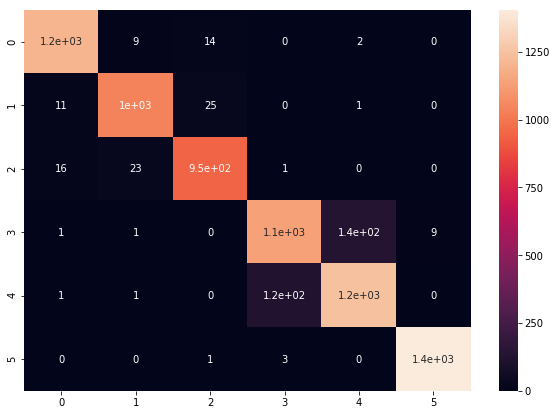

In [68]:


num_features = X_train.shape[1]
num_labels = y_train.shape[1]
num_hidden = 1

graph = tf.Graph()
with graph.as_default():
    tf_train_set = tf.constant(X_train)
    tf_train_labels = tf.constant(y_train)
    tf_valid_set = tf.constant(X_test)

    # print(tf_train_set)
    # print(tf_train_labels)

    weights_1 = tf.Variable(tf.truncated_normal([num_features, num_labels]))

    bias_1 = tf.Variable(tf.zeros([num_labels]))

    logits_1 = tf.matmul(tf_train_set, weights_1) + bias_1

    #loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_1, labels = tf_train_labels))

    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits_1, labels = tf_train_labels))
    optimizer = tf.train.GradientDescentOptimizer(.005).minimize(loss)

    ## Training prediction
    predict_train = tf.nn.softmax(logits_1)

    # Validation prediction
    logits_1_val = tf.matmul(tf_valid_set, weights_1) + bias_1
    predict_valid = tf.nn.softmax(logits_1_val)



def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])


num_steps = 40000
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()

    for step in range(num_steps+1):
        _, l, predictions = session.run([optimizer, loss, predict_train])

        if (step % 2000 == 0):
            # print(predictions[3:6])
            print('Loss at step %d: %f' % (step, l))
            print('Training accuracy: %.1f%%' % accuracy(predictions, y_train[:, :]))
            print('Test accuracy: %.1f%%' % accuracy(predict_valid.eval(), y_test))
            print('-' * 60)
        if (step == num_steps):
            plt.figure(figsize=(10, 7))
            confusion = confusion_matrix(np.argmax(y_train,1), np.argmax(predictions,1))
            sns.heatmap(confusion, annot=True)
            plt.show()


Construct a Linear Classifier.

By using one-hot encoding, we transform our label with dimension n x 1 to n x c, where n denotes the total number of training examples, and c denotes the total number of categories, in the HAR example, c = 6.

We use the softmax cross entropy loss as our loss function.

Our linear model is the Neural Network but without the activation function.

Finally we achieved 91.7% accuracy in test set.

As we can see from the confusion matrix, the most errors that our model made is when distinguishing between sitting and standing.



So, first round: we can pick Logistic Regression as the winner among Linear models. Salute!